In [133]:
library(mvtnorm)
sigma = matrix(c(4, 0,0, 9), ncol = 2)
mu_0 = c(0, 0)
s_0 = matrix(c(100, 0, 0, 100), ncol = 2)

x1 = seq(-8, 8, length = 50)
x2 = x1
plot_2d = function(x1, x2, mu, sigma, col = "orange") {
    f = function(x1, x2) {
      dmvnorm(matrix(c(x1, x2), ncol = 2), mean = mu, sigma = sigma)
    }
    z = outer(x1, x2, f)
    persp(x1, x2, z,  expand = 0.8, col = col, ticktype="detailed", zlim=c(0, 0.1)) 
}

update_s = function(s, sigma, N) {
    return(solve(solve(s) + N * solve(sigma)))
}

update_mu = function(mu, mu.ml, s, sigma, N) {
    return((solve(solve(s) + N * solve(sigma))) %*% (solve(s) %*% mu + N * solve(sigma) %*% mu.ml))
}

## (2) 事後分布の平均と共分散行列
以下のcellの計算より、次のように求まる。
\begin{eqnarray}
\mu_n = (2.07, -1.07)
\end{eqnarray}

\begin{eqnarray}
s_n = \left(
\begin {array}{ccc}
1.32 & 0 \\
0 & 2.91  
\end{array}
\right)
\end{eqnarray}

In [134]:
x = rbind(c(3.1, 1.6), c(5.7, 0), c(-2.5, -4.9) )
mu.ml = c(colMeans(x))
mu_1 = update_mu(mu_0, mu.ml, s_0, sigma, 3)
s_1 =  update_s(s_0, sigma, 3)
print("平均mu_1")
print(mu_1)
print("共分散行列s_1")
print(s_1)

[1] "平均mu_1"
          [,1]
[1,]  2.072368
[2,] -1.067961
[1] "共分散行列s_1"
         [,1]     [,2]
[1,] 1.315789 0.000000
[2,] 0.000000 2.912621


## (3) 事前分布と事後分布の描画
### 事前分布

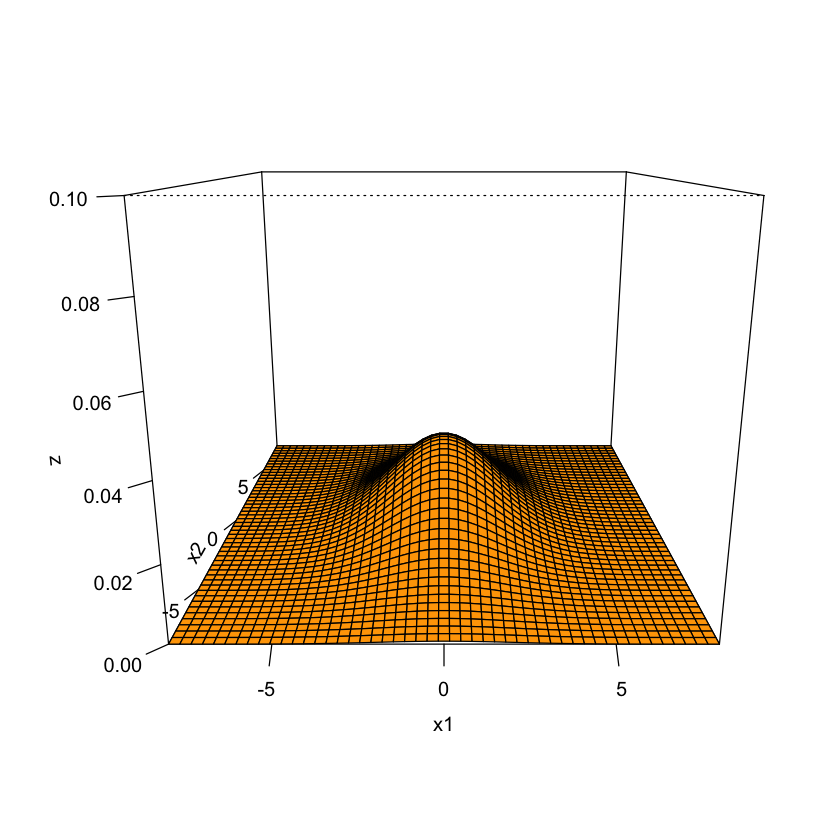

In [125]:
plot_2d(x1, x2, mu_0, sigma)

### 事後分布

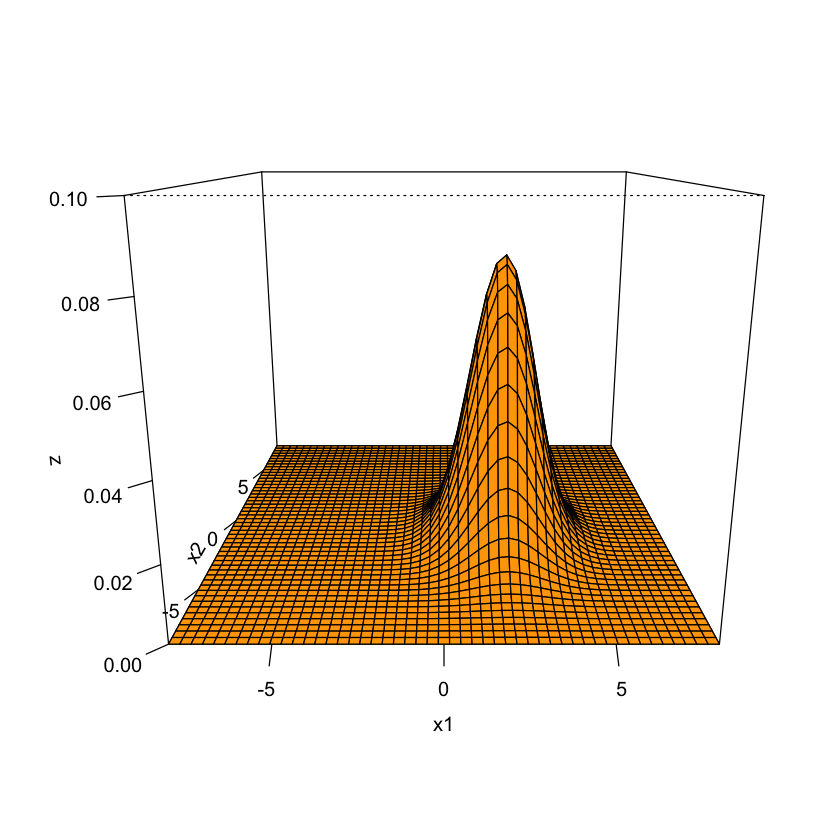

In [126]:
plot_2d(x1, x2, mu_1,s_1)